Note:
Handling Imbalanced Dataset without SMOTE using multiple Algorithms and hyper parameter tuning with grid search and random search
Handling Imbalanced Dataset with SMOTE using multiple Algorithms and hyper parameter tuning with grid search and random search




This file covers following models :
1.   Perceptron
2.   Support Vector Machine
3.   Decision Tree
4.   Random Forest



##Import Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



##Data Preparartion

In [ ]:
file = "crx.data"
column_names = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'Class']
data = pd.read_csv(file, names=column_names, sep=',', na_values='?')
data = data.replace('?', np.nan)
data.dropna(inplace=True)
#data.drop_duplicates(inplace=True)
print(data.head())
# print(data.columns)
data.shape


  A1     A2     A3 A4 A5 A6 A7    A8 A9 A10  A11 A12 A13    A14  A15 Class
0  b  30.83  0.000  u  g  w  v  1.25  t   t    1   f   g  202.0    0     +
1  a  58.67  4.460  u  g  q  h  3.04  t   t    6   f   g   43.0  560     +
2  a  24.50  0.500  u  g  q  h  1.50  t   f    0   f   g  280.0  824     +
3  b  27.83  1.540  u  g  w  v  3.75  t   t    5   t   g  100.0    3     +
4  b  20.17  5.625  u  g  w  v  1.71  t   f    0   f   s  120.0    0     +


(653, 16)

In [ ]:
from os import replace
# Separate features and target
replace_map = {'+': 1, '-': 0}
data['Class'] = data['Class'].replace(replace_map)

<ipython-input-4-6a55f5a09167>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Class'] = data['Class'].replace(replace_map)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 653 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      653 non-null    object 
 1   A2      653 non-null    float64
 2   A3      653 non-null    float64
 3   A4      653 non-null    object 
 4   A5      653 non-null    object 
 5   A6      653 non-null    object 
 6   A7      653 non-null    object 
 7   A8      653 non-null    float64
 8   A9      653 non-null    object 
 9   A10     653 non-null    object 
 10  A11     653 non-null    int64  
 11  A12     653 non-null    object 
 12  A13     653 non-null    object 
 13  A14     653 non-null    float64
 14  A15     653 non-null    int64  
 15  Class   653 non-null    int64  
dtypes: float64(4), int64(3), object(9)
memory usage: 86.7+ KB


In [ ]:
# Fill missing values with the most frequent value for simplicity
data.fillna(data.mode().iloc[0], inplace=True)
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


In [ ]:
# Convert categorical columns to numerical using dummy encoding
data = pd.get_dummies(data, drop_first=True)
data.head()

,A2,A3,A8,A11,A14,A15,Class,A1_b,A4_u,A4_y,...,A7_j,A7_n,A7_o,A7_v,A7_z,A9_t,A10_t,A12_t,A13_p,A13_s
0,30.83,0.000,1.25,1,202.0,0,1,True,True,False,...,False,False,False,True,False,True,True,False,False,False
1,58.67,4.460,3.04,6,43.0,560,1,False,True,False,...,False,False,False,False,False,True,True,False,False,False
2,24.50,0.500,1.50,0,280.0,824,1,False,True,False,...,False,False,False,False,False,True,False,False,False,False
3,27.83,1.540,3.75,5,100.0,3,1,True,True,False,...,False,False,False,True,False,True,True,True,False,False
4,20.17,5.625,1.71,0,120.0,0,1,True,True,False,...,False,False,False,True,False,True,False,False,False,True


In [ ]:
# Normalize or standardize numeric columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  # Or MinMaxScaler()
tmp = scaler.fit_transform(data[['A2','A3','A8','A11', 'A14','A15']])
data[['A2','A3','A8','A11', 'A14','A15']] = tmp
data = pd.DataFrame(data, columns= data.columns)

In [ ]:
data.head()

,A2,A3,A8,A11,A14,A15,Class,A1_b,A4_u,A4_y,...,A7_j,A7_n,A7_o,A7_v,A7_z,A9_t,A10_t,A12_t,A13_p,A13_s
0,-0.056962,-0.961440,-0.295171,-0.302596,0.128682,-0.193125,1,True,True,False,...,False,False,False,True,False,True,True,False,False,False
1,2.296536,-0.073565,0.236217,0.704516,-0.816802,-0.086443,1,False,True,False,...,False,False,False,False,False,True,True,False,False,False
2,-0.592078,-0.861903,-0.220955,-0.504019,0.592504,-0.036150,1,False,True,False,...,False,False,False,False,False,True,False,False,False,False
3,-0.310572,-0.654865,0.446990,0.503093,-0.477855,-0.192553,1,True,True,False,...,False,False,False,True,False,True,True,True,False,False
4,-0.958122,0.158358,-0.158613,-0.504019,-0.358926,-0.193125,1,True,True,False,...,False,False,False,True,False,True,False,False,False,True


Detect X and Y

In [ ]:
# Detect X and y
target_column = data.columns[-1]  # Automatically detects the last column
feature = data.columns[:-1]  # Automatically detects the column

X = data[feature]
y = data[target_column].astype(int)  # Convert to integer type




In [ ]:
# Identify columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

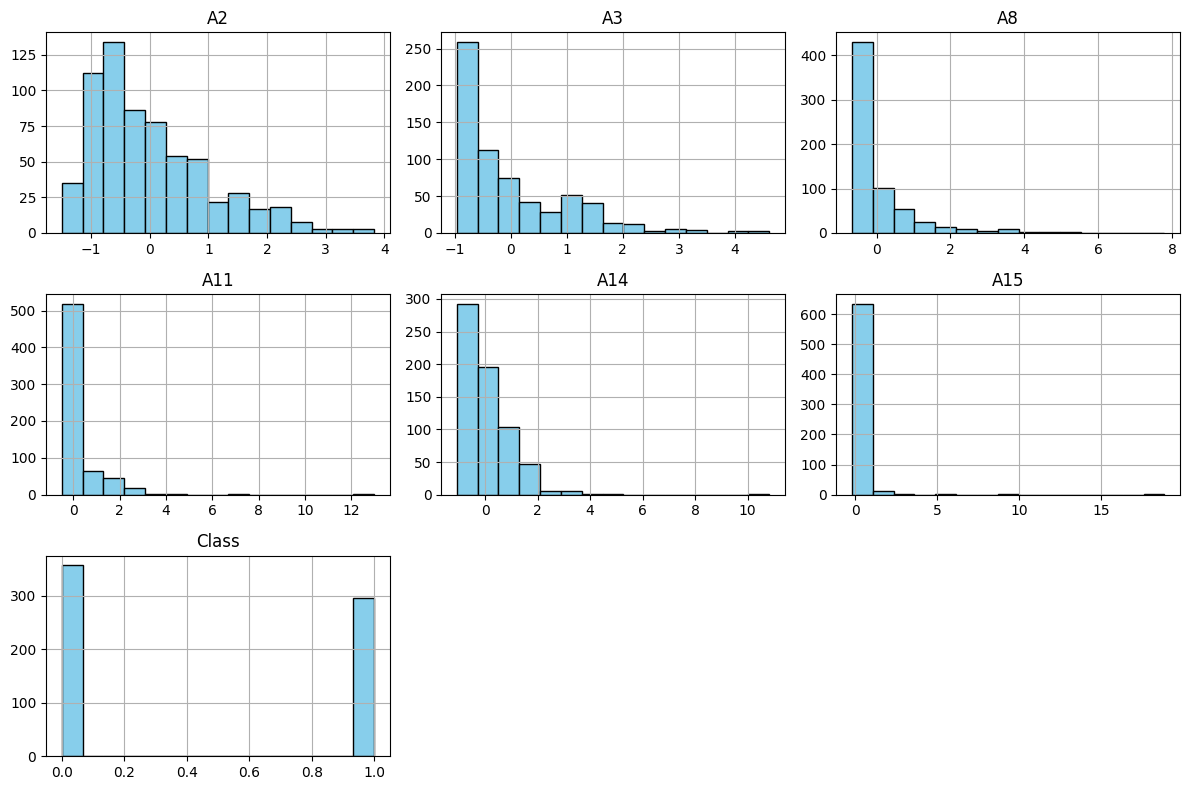

In [ ]:
# Histograms for numerical columns
data[numerical_columns].hist(bins=15, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()



## Train-Test Split
We will split the dataset into training and testing sets using a 70/30 split ratio.

In [ ]:
# Step 2: Train-Test Split
print("\nStep 2: Splitting the data into training and testing sets")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
unique_train, counts_train = np.unique(y_train, return_counts=True)
print(f"Class distribution in training set: {dict(zip(unique_train, counts_train))}")
unique_test, counts_test = np.unique(y_test, return_counts=True)
print(f"Class distribution in testing set: {dict(zip(unique_test, counts_test))}")


Step 2: Splitting the data into training and testing sets
Class distribution in training set: {0: 418, 1: 39}
Class distribution in testing set: {0: 182, 1: 14}


##Support Vector Machine

In [ ]:
# Step 3: Train an SVM on the Imbalanced Dataset
print("\nStep 3: Training an SVM on the imbalanced dataset")
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_imbalanced = svm.predict(X_test)

# Report metrics before SMOTE
print("SVM \nMetrics Before SMOTE:")
imbalanced_report = classification_report(y_test, y_pred_imbalanced)
accuracy_imb_svm=accuracy_score(y_test, y_pred_imbalanced)
precision_score_imb_svm=precision_score(y_test, y_pred_imbalanced)
recall_score_imb_svm=recall_score(y_test, y_pred_imbalanced)
f1_score_imb_svm=f1_score(y_test, y_pred_imbalanced)
print("Accuracy for imbalanced dataset",accuracy_imb_svm)
print("Precision for imbalanced dataset",precision_score_imb_svm)
print("Recall for imbalanced dataset",recall_score_imb_svm)
print("F1 score for imbalanced dataset",f1_score_imb_svm)
cm_svm=confusion_matrix(y_test, y_pred_imbalanced)
#Get values for TP, TN, FP, FN
TP,TN,FP, FN =cm_svm.ravel()
print("True Positive",TP)
print("True Negative",TN)
print("False Positive",FP)
print("False Negative",FN)
print("Confusion Matrix Report for imbalanced dataset SVM", cm_svm)



Step 3: Training an SVM on the imbalanced dataset
SVM 
Metrics Before SMOTE:
Accuracy for imbalanced dataset 0.9438775510204082
Precision for imbalanced dataset 0.7142857142857143
Recall for imbalanced dataset 0.35714285714285715
F1 score for imbalanced dataset 0.47619047619047616
True Positive 180
True Negative 2
False Positive 9
False Negative 5
Confusion Matrix Report for imbalanced dataset SVM [[180   2]
 [  9   5]]


##Decision Tree

In [ ]:
# Step 3: Train an decision tree on the Imbalanced Dataset
print("\nStep 3: Training an decision tree on the imbalanced dataset")
dtree = DecisionTreeClassifier(random_state=42)
dtree .fit(X_train, y_train)
y_pred_imbalanced = dtree.predict(X_test)

# Report metrics before SMOTE
print("Decison Tree \nMetrics Before SMOTE:")
imbalanced_report = classification_report(y_test, y_pred_imbalanced)
accuracy_imb_dtree=accuracy_score(y_test, y_pred_imbalanced)
precision_score_imb_dtree=precision_score(y_test, y_pred_imbalanced)
recall_score_imb_dtree=recall_score(y_test, y_pred_imbalanced)
f1_score_imb_dtree=f1_score(y_test, y_pred_imbalanced)
print("Accuracy for imbalanced dataset",accuracy_imb_dtree)
print("Precision for imbalanced dataset",precision_score_imb_dtree)
print("Recall for imbalanced dataset",recall_score_imb_dtree)
print("F1 score for imbalanced dataset",f1_score_imb_dtree)
cm_dtree=confusion_matrix(y_test, y_pred_imbalanced)
#Get values for TP, TN, FP, FN
TP,TN,FP, FN =cm_dtree.ravel()
print("True Positive",TP)
print("True Negative",TN)
print("False Positive",FP)
print("False Negative",FN)
print("Confusion Matrix Report for imbalanced dataset Decision Tree", cm_dtree)


Step 3: Training an decision tree on the imbalanced dataset
Decison Tree 
Metrics Before SMOTE:
Accuracy for imbalanced dataset 0.8826530612244898
Precision for imbalanced dataset 0.2857142857142857
Recall for imbalanced dataset 0.42857142857142855
F1 score for imbalanced dataset 0.34285714285714286
True Positive 167
True Negative 15
False Positive 8
False Negative 6
Confusion Matrix Report for imbalanced dataset Decision Tree [[167  15]
 [  8   6]]


##Perceptron

In [ ]:
# Step 3: Train an perceptron on the Imbalanced Dataset
print("\nStep 3: Training an perceptron on the imbalanced dataset")
perceptron = Perceptron(random_state=42)
perceptron .fit(X_train, y_train)
y_pred_imbalanced = perceptron.predict(X_test)

# Report metrics before SMOTE
print("Perceptron \nMetrics Before SMOTE:")
imbalanced_report = classification_report(y_test, y_pred_imbalanced)
accuracy_imb_percep=accuracy_score(y_test, y_pred_imbalanced)
precision_score_imb_percep=precision_score(y_test, y_pred_imbalanced)
recall_score_imb_percep=recall_score(y_test, y_pred_imbalanced)
f1_score_imb_percep=f1_score(y_test, y_pred_imbalanced)
print("Accuracy for imbalanced dataset",accuracy_imb_percep)
print("Precision for imbalanced dataset",precision_score_imb_percep)
print("Recall for imbalanced dataset",recall_score_imb_percep)
print("F1 score for imbalanced dataset",f1_score_imb_percep)
cm_perceptron=confusion_matrix(y_test, y_pred_imbalanced)
#Get values for TP, TN, FP, FN
TP,TN,FP, FN =cm_perceptron.ravel()
print("True Positive",TP)
print("True Negative",TN)
print("False Positive",FP)
print("False Negative",FN)
print("Confusion Matrix Report for imbalanced dataset Perceptron", cm_perceptron)


Step 3: Training an perceptron on the imbalanced dataset
Perceptron 
Metrics Before SMOTE:
Accuracy for imbalanced dataset 0.9081632653061225
Precision for imbalanced dataset 0.16666666666666666
Recall for imbalanced dataset 0.07142857142857142
F1 score for imbalanced dataset 0.1
True Positive 177
True Negative 5
False Positive 13
False Negative 1
Confusion Matrix Report for imbalanced dataset Perceptron [[177   5]
 [ 13   1]]


##Ensemble Random Forest

In [ ]:
# Step 4: Apply Ensemble Random Forest
print("\nStep 4: Applying Ensemble Random Forest to imbalanced dataset")
rftree = RandomForestClassifier(random_state=42)

# Train an Ensemble Random Forest on the Imbalanced Dataset
print("Training an Ensemble Random Foreston the imbalanced dataset")
rftree .fit(X_train, y_train)
y_pred_imbalanced = rftree.predict(X_test)

# Report metrics
print("Random forest \nClassification Report :")
imbalanced_report = classification_report(y_test, y_pred_imbalanced)
print(imbalanced_report)
accuracy_imbal_rf=accuracy_score(y_test, y_pred_imbalanced)
precision_imbal_rf=precision_score(y_test, y_pred_imbalanced)
recall_imbal_rf=recall_score(y_test, y_pred_imbalanced)
f1_score_imbal_rf=f1_score(y_test, y_pred_imbalanced)
print("Accuracy for imbalanced dataset",accuracy_imbal_rf)
print("Precision for imbalanced dataset",precision_imbal_rf)
print("Recall for imbalanced dataset",recall_imbal_rf)
print("F1 score for imbalanced dataset",f1_score_imbal_rf)
cm_rf=confusion_matrix(y_test, y_pred_imbalanced)
#Get values for TP, TN, FP, FN
TP,TN,FP, FN =cm_rf.ravel()
print("True Positive",TP)
print("True Negative",TN)
print("False Positive",FP)
print("False Negative",FN)
print("Confusion Matrix Report for imbalanced dataset Random Forest", cm_rf)


Step 4: Applying Ensemble Random Forest to imbalanced dataset
Training an Ensemble Random Foreston the imbalanced dataset
Random forest 
Classification Report :
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       182
           1       0.60      0.21      0.32        14

    accuracy                           0.93       196
   macro avg       0.77      0.60      0.64       196
weighted avg       0.92      0.93      0.92       196

Accuracy for imbalanced dataset 0.9336734693877551
Precision for imbalanced dataset 0.6
Recall for imbalanced dataset 0.21428571428571427
F1 score for imbalanced dataset 0.3157894736842105
True Positive 180
True Negative 2
False Positive 11
False Negative 3
Confusion Matrix Report for imbalanced dataset Random Forest [[180   2]
 [ 11   3]]


## Visualizing Class Distribution Before SMOTE
We will plot the class distribution in the training set before applying SMOTE.

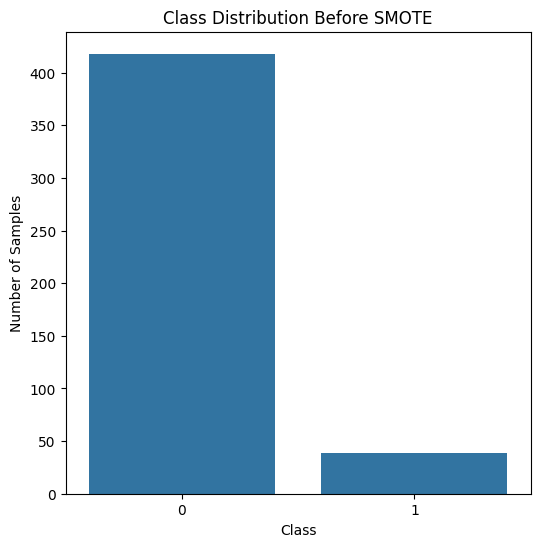

In [ ]:
# Plot the class distribution before SMOTE
plt.figure(figsize=(6, 6))
sns.barplot(x=list(unique_train), y=list(counts_train))
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.show()

## Apply SMOTE
We will apply SMOTE (Synthetic Minority Oversampling Technique) to balance the training set and ensure both classes have an equal number of samples.

In [ ]:
# Step 4: Apply SMOTE
print("\nStep 4: Applying SMOTE to balance the training set")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
unique_smote, counts_smote = np.unique(y_train_smote, return_counts=True)
print(f"Class distribution after applying SMOTE: {dict(zip(unique_smote, counts_smote))}")


Step 4: Applying SMOTE to balance the training set
Class distribution after applying SMOTE: {0: 418, 1: 418}


##We will retrain all the models on the SMOTE-balanced dataset and report the new metrics.

## Train an SVM on the Balanced Dataset





In [ ]:
# Step 5: Train an SVM on the Balanced Dataset
print("\nStep 5: Training an SVM on the SMOTE-balanced dataset")
svm_smote = SVC(kernel='linear', random_state=42)
svm_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = svm_smote.predict(X_test)

# Report metrics after SMOTE
print("SVM \nClassification Report After SMOTE:")
smote_report = classification_report(y_test, y_pred_smote)
print(smote_report)
accuracy_bal_svm=accuracy_score(y_test, y_pred_smote)
precision_score_bal_svm=precision_score(y_test, y_pred_smote)
recall_score_bal_svm=recall_score(y_test, y_pred_smote)
f1_score_ibal_svm=f1_score(y_test, y_pred_smote)
print("Accuracy for balanced dataset",accuracy_bal_svm)
print("Precision for balanced dataset",precision_score_bal_svm)
print("Recall for balanced dataset",recall_score_bal_svm)
print("F1 score for balanced dataset",f1_score_ibal_svm)
cm_svm_smote=confusion_matrix(y_test, y_pred_smote)
#Get values for TP, TN, FP, FN
TP,TN,FP, FN =cm_svm_smote.ravel()
print("True Positive",TP)
print("True Negative",TN)
print("False Positive",FP)
print("False Negative",FN)
print("Confusion Matrix Report for balanced dataset SVM", cm_svm_smote)


Step 5: Training an SVM on the SMOTE-balanced dataset
SVM 
Classification Report After SMOTE:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       182
           1       0.31      0.36      0.33        14

    accuracy                           0.90       196
   macro avg       0.63      0.65      0.64       196
weighted avg       0.90      0.90      0.90       196

Accuracy for balanced dataset 0.8979591836734694
Precision for balanced dataset 0.3125
Recall for balanced dataset 0.35714285714285715
F1 score for balanced dataset 0.3333333333333333
True Positive 171
True Negative 11
False Positive 9
False Negative 5
Confusion Matrix Report for balanced dataset SVM [[171  11]
 [  9   5]]


## Train an Decision Tree on the Balanced Dataset


In [ ]:
# Step 5: Train an decision tree on the Balanced Dataset
print("\nStep 5: Training an decision tree on the SMOTE-balanced dataset")
dtree_smote = DecisionTreeClassifier(random_state=42)
dtree_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = dtree_smote.predict(X_test)

# Report metrics after SMOTE
print(" Decision Tree \nClassification Report After SMOTE:")
smote_report = classification_report(y_test, y_pred_smote)
print(smote_report)
accuracy_bal_dtree=accuracy_score(y_test, y_pred_smote)
precision_score_bal_dtree=precision_score(y_test, y_pred_smote)
recall_score_bal_dtree=recall_score(y_test, y_pred_smote)
f1_score_ibal_dtree=f1_score(y_test, y_pred_smote)
print("Accuracy for balanced dataset",accuracy_bal_dtree)
print("Precision for balanced dataset",precision_score_bal_dtree)
print("Recall for balanced dataset",recall_score_bal_dtree)
print("F1 score for balanced dataset",f1_score_ibal_dtree)
cm_dtree_smote=confusion_matrix(y_test, y_pred_smote)
#Get values for TP, TN, FP, FN
TP,TN,FP, FN =cm_dtree_smote.ravel()
print("True Positive",TP)
print("True Negative",TN)
print("False Positive",FP)
print("False Negative",FN)
print("Confusion Matrix Report for balanced dataset Decison Tree", cm_dtree_smote)


Step 5: Training an decision tree on the SMOTE-balanced dataset
 Decision Tree 
Classification Report After SMOTE:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       182
           1       0.32      0.64      0.43        14

    accuracy                           0.88       196
   macro avg       0.65      0.77      0.68       196
weighted avg       0.92      0.88      0.90       196

Accuracy for balanced dataset 0.8775510204081632
Precision for balanced dataset 0.32142857142857145
Recall for balanced dataset 0.6428571428571429
F1 score for balanced dataset 0.42857142857142855
True Positive 163
True Negative 19
False Positive 5
False Negative 9
Confusion Matrix Report for balanced dataset Decison Tree [[163  19]
 [  5   9]]


## Train an Perceptron on the Balanced Dataset


In [ ]:
# Step 5: Train an Perceptron on the Balanced Dataset
print("\nStep 5: Training an perceptron on the SMOTE-balanced dataset")
perceptron_smote = Perceptron(random_state=42)
perceptron_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = perceptron_smote.predict(X_test)

# Report metrics after SMOTE
print("Perceptron \nClassification Report After SMOTE:")
smote_report = classification_report(y_test, y_pred_smote)
print(smote_report)
accuracy_bal_percep=accuracy_score(y_test, y_pred_smote)
precision_score_bal_percep=precision_score(y_test, y_pred_smote)
recall_score_bal_percep=recall_score(y_test, y_pred_smote)
f1_score_ibal_percep=f1_score(y_test, y_pred_smote)
print("Accuracy for balanced dataset",accuracy_bal_percep)
print("Precision for balanced dataset",precision_score_bal_percep)
print("Recall for balanced dataset",recall_score_bal_percep)
print("F1 score for balanced dataset",f1_score_ibal_percep)
cm_perceptron_smote=confusion_matrix(y_test, y_pred_smote)
#Get values for TP, TN, FP, FN
TP,TN,FP, FN =cm_perceptron_smote.ravel()
print("True Positive",TP)
print("True Negative",TN)
print("False Positive",FP)
print("False Negative",FN)
print("Confusion Matrix Report for balanced dataset Perceptron", cm_perceptron_smote)


Step 5: Training an perceptron on the SMOTE-balanced dataset
Perceptron 
Classification Report After SMOTE:
              precision    recall  f1-score   support

           0       0.98      0.79      0.88       182
           1       0.22      0.79      0.35        14

    accuracy                           0.79       196
   macro avg       0.60      0.79      0.61       196
weighted avg       0.93      0.79      0.84       196

Accuracy for balanced dataset 0.7908163265306123
Precision for balanced dataset 0.22448979591836735
Recall for balanced dataset 0.7857142857142857
F1 score for balanced dataset 0.3492063492063492
True Positive 144
True Negative 38
False Positive 3
False Negative 11
Confusion Matrix Report for balanced dataset Perceptron [[144  38]
 [  3  11]]


## Train Ensemble Random Forest on Balanced Dataset

In [ ]:
# Step 4: Apply Ensemble Random Forest on Balanced dataset
print("\nStep 4: Applying Ensemble Random Forest to balance the training set")
rftree = RandomForestClassifier(random_state=42)

# Train an Ensemble Random Forest on the balanced Dataset
print("Training an Ensemble Random Foreston the balanced dataset")
rftree .fit(X_train_smote, y_train_smote)
y_pred_balanced = rftree.predict(X_test)

# Report metrics
print("Random Forest \nClassification Report :")
imbalanced_report = classification_report(y_test, y_pred_balanced)
print(imbalanced_report)
accuracy_bal_rf=accuracy_score(y_test, y_pred_balanced)
precision_bal_rf=precision_score(y_test, y_pred_balanced)
recall_bal_rf=recall_score(y_test, y_pred_balanced)
f1_score_bal_rf=f1_score(y_test, y_pred_balanced)
print("Accuracy for balanced dataset",accuracy_bal_rf)
print("Precision for balanced dataset",precision_bal_rf)
print("Recall for balanced dataset",recall_bal_rf)
print("F1 score for balanced dataset",f1_score_bal_rf)
cm_rf_smote=confusion_matrix(y_test, y_pred_balanced)
#Get values for TP, TN, FP, FN
TP,TN,FP, FN =cm_rf_smote.ravel()
print("True Positive",TP)
print("True Negative",TN)
print("False Positive",FP)
print("False Negative",FN)
print("Confusion Matrix Report for balanced dataset Random forest", cm_rf_smote)


Step 4: Applying Ensemble Random Forest to balance the training set
Training an Ensemble Random Foreston the balanced dataset
Random Forest 
Classification Report :
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       182
           1       0.38      0.43      0.40        14

    accuracy                           0.91       196
   macro avg       0.67      0.69      0.68       196
weighted avg       0.91      0.91      0.91       196

Accuracy for balanced dataset 0.9081632653061225
Precision for balanced dataset 0.375
Recall for balanced dataset 0.42857142857142855
F1 score for balanced dataset 0.4
True Positive 172
True Negative 10
False Positive 8
False Negative 6
Confusion Matrix Report for balanced dataset Random forest [[172  10]
 [  8   6]]


## Step 7: Visualizing Class Distribution After SMOTE
We will plot the class distribution after applying SMOTE.

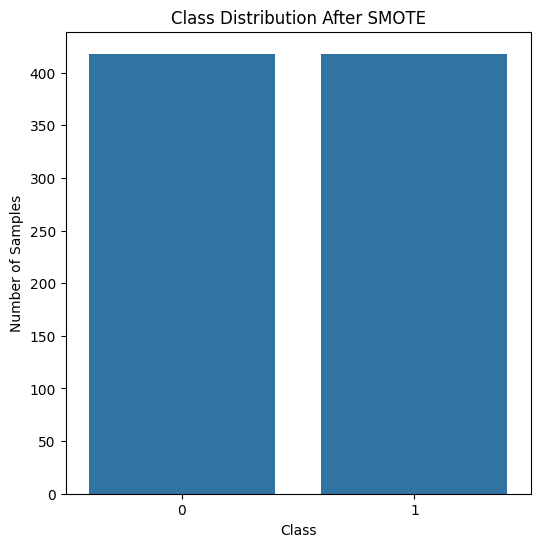

In [ ]:
# Plot the class distribution after SMOTE
plt.figure(figsize=(6, 6))
sns.barplot(x=list(unique_smote), y=list(counts_smote))
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.show()

Visualization of the Baseline models using Bar graph

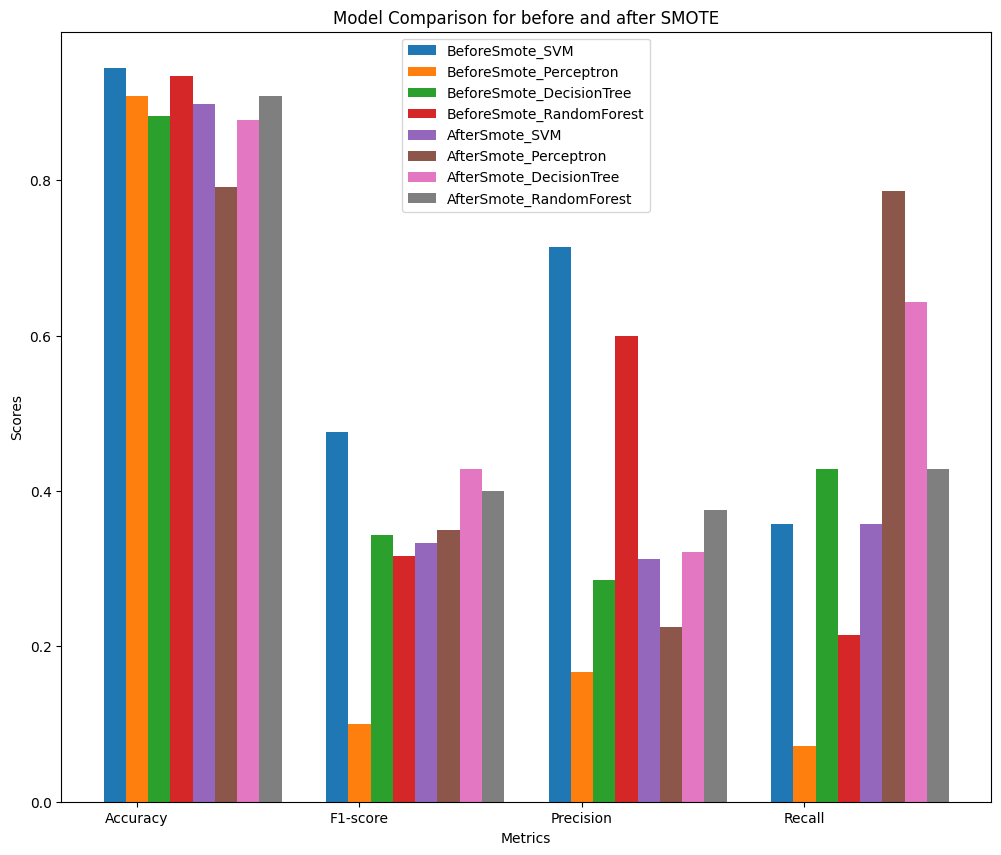

In [ ]:
from re import A
# Define your metrics
plt.figure(figsize=(12, 10))
metrics = ['Accuracy', 'F1-score', 'Precision','Recall']
BeforeSmote_SVM = [
    accuracy_imb_svm, f1_score_imb_svm, precision_score_imb_svm, recall_score_imb_svm]
BeforeSmote_Perceptron = [
    accuracy_imb_percep, f1_score_imb_percep, precision_score_imb_percep, recall_score_imb_percep]
BeforeSmote_DecisionTree = [
    accuracy_imb_dtree, f1_score_imb_dtree, precision_score_imb_dtree, recall_score_imb_dtree]
BeforeSmote_RandomForest = [
    accuracy_imbal_rf, f1_score_imbal_rf, precision_imbal_rf, recall_imbal_rf]
#----------------------------------------------------------------------------------------------------------
AfterSmote_SVM=[
accuracy_bal_svm, f1_score_ibal_svm, precision_score_bal_svm, recall_score_bal_svm]
AfterSmote_Perceptron = [
    accuracy_bal_percep, f1_score_ibal_percep, precision_score_bal_percep, recall_score_bal_percep]
AfterSmote_DecisionTree = [
    accuracy_bal_dtree, f1_score_ibal_dtree, precision_score_bal_dtree, recall_score_bal_dtree]
AfterSmote_RandomForest = [
    accuracy_bal_rf, f1_score_bal_rf, precision_bal_rf, recall_bal_rf]

# Plot comparison
index = np.arange(len(metrics))
bar_width = 0.1

plt.bar(index, BeforeSmote_SVM, bar_width, label='BeforeSmote_SVM')
plt.bar(index + bar_width*1, BeforeSmote_Perceptron, bar_width, label='BeforeSmote_Perceptron')
plt.bar(index + bar_width*2, BeforeSmote_DecisionTree, bar_width, label='BeforeSmote_DecisionTree')
plt.bar(index + bar_width*3, BeforeSmote_RandomForest, bar_width, label='BeforeSmote_RandomForest')
plt.bar(index + bar_width*4, AfterSmote_SVM, bar_width, label='AfterSmote_SVM')
plt.bar(index + bar_width*5, AfterSmote_Perceptron, bar_width, label='AfterSmote_Perceptron')
plt.bar(index + bar_width*6, AfterSmote_DecisionTree, bar_width, label='AfterSmote_DecisionTree')
plt.bar(index + bar_width*7, AfterSmote_RandomForest, bar_width, label='AfterSmote_RandomForest')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Model Comparison for before and after SMOTE')
plt.xticks(index + bar_width, metrics)
plt.legend()
plt.show()

## Apply Hyper Parameter Tuning on Imbalanced Dataset


In [ ]:
# list of models
models = [Perceptron(), SVC(kernel='linear'), DecisionTreeClassifier(), RandomForestClassifier(random_state=0)]

Comparing the models with different Hyperparameter values using GridSearchCV

In [ ]:
models_list = [Perceptron(), SVC(kernel='linear'), DecisionTreeClassifier(), RandomForestClassifier(random_state=0)]

In [ ]:
# creating a dictionary that contains hyperparameter values for the above mentioned models


model_hyperparameters = {
    'perceptron_hyperparameters': {
        'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100],  # Regularization strength
        'max_iter': [1000, 5000, 10000]       # Number of iterations
    },
    'svc_hyperparameters': {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel types
        'C': [1, 5, 10, 20]                             # Regularization strength
    },
    'decision_tree_hyperparameters': {
        'max_depth': [5, 10, 20, 30, 40, 50],                # Maximum depth of tree
        'min_samples_split': [2, 5, 10],                # Minimum samples to split a node
        'criterion': ['gini', 'entropy']                # Splitting criteria
    },
    'random_forest_hyperparameters': {
        'n_estimators': [10, 20, 50, 100, 500, 1000],              # Number of trees
        'max_depth': [5, 10, 20, 30, 40, 50],                    # Maximum depth of trees
        'min_samples_split': [2, 5, 10, 20],                 # Minimum samples to split a node
        'max_features': ['sqrt', 'log2', None]
    }
}


In [ ]:
type(model_hyperparameters)

dict

In [ ]:
print(model_hyperparameters.keys())

dict_keys(['perceptron_hyperparameters', 'svc_hyperparameters', 'decision_tree_hyperparameters', 'random_forest_hyperparameters'])


In [ ]:
model_keys = list(model_hyperparameters.keys())
print(model_keys)

['perceptron_hyperparameters', 'svc_hyperparameters', 'decision_tree_hyperparameters', 'random_forest_hyperparameters']


##Applying GridSearchCV on Imbalanced Dataset

In [ ]:
def ModelSelection(list_of_models, hyperparameters_dictionary):

  result = []

  i = 0

  for model in list_of_models:

    key = model_keys[i]

    params = hyperparameters_dictionary[key]

    i += 1

    print(model)
    print(params)
    print('---------------------------------')


    classifier = GridSearchCV(model, params, cv=5, scoring='accuracy' )

    # fitting the data to classifier
    classifier.fit(X_train,y_train)

    result.append({
        'model used' : model,
        'highest score' : classifier.best_score_,
        'best hyperparameters' : classifier.best_params_
    })

  result_dataframe = pd.DataFrame(result, columns = ['model used','highest score','best hyperparameters'])

  return result_dataframe

In [ ]:
dds= ModelSelection(models_list, model_hyperparameters)

Perceptron()
{'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100], 'max_iter': [1000, 5000, 10000]}
---------------------------------
SVC(kernel='linear')
{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}
---------------------------------


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


DecisionTreeClassifier()
{'max_depth': [5, 10, 20, 30, 40, 50], 'min_samples_split': [2, 5, 10], 'criterion': ['gini', 'entropy']}
---------------------------------
RandomForestClassifier(random_state=0)
{'n_estimators': [10, 20, 50, 100, 500, 1000], 'max_depth': [5, 10, 20, 30, 40, 50], 'min_samples_split': [2, 5, 10, 20], 'max_features': ['sqrt', 'log2', None]}
---------------------------------


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
dds['best hyperparameters'][3]

{'max_depth': 10,
 'max_features': 'log2',
 'min_samples_split': 5,
 'n_estimators': 10}

In [ ]:

 # Step 4: Apply best parameters to Ensemble Random Forest
print("\nStep 4: Applying Best Parameters Ensemble Random Forest to imbalance the training set")
rftree = RandomForestClassifier(random_state=42, max_depth=10, min_samples_split=5,n_estimators=10, max_features='log2')

# Train an Ensemble Random Forest on the Imbalanced Dataset
print("Training an Ensemble Random Foreston the imbalanced dataset")
rftree.fit(X_train, y_train)
y_pred_imbalanced = rftree.predict(X_test)

# Report metrics
print("\nClassification Report :")
imbalanced_report = classification_report(y_test, y_pred_imbalanced)
print(imbalanced_report)
accuracy_imbal_rf=accuracy_score(y_test, y_pred_imbalanced)
precision_imbal_rf=precision_score(y_test, y_pred_imbalanced)
recall_imbal_rf=recall_score(y_test, y_pred_imbalanced)
f1_score_imbal_rf=f1_score(y_test, y_pred_imbalanced)
print("Accuracy for imbalanced dataset",accuracy_imbal_rf)
print("Precision for imbalanced dataset",precision_imbal_rf)
print("Recall for imbalanced dataset",recall_imbal_rf)
print("F1 score for imbalanced dataset",f1_score_imbal_rf)
cm_rf=confusion_matrix(y_test, y_pred_imbalanced)
#Get values for TP, TN, FP, FN
TP,TN,FP, FN =cm_rf.ravel()
print("True Positive",TP)
print("True Negative",TN)
print("False Positive",FP)
print("False Negative",FN)
print("Confusion Matrix Report for imbalanced dataset Random Forest", cm_rf)


Step 4: Applying Best Parameters Ensemble Random Forest to imbalance the training set
Training an Ensemble Random Foreston the imbalanced dataset

Classification Report :
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       182
           1       1.00      0.29      0.44        14

    accuracy                           0.95       196
   macro avg       0.97      0.64      0.71       196
weighted avg       0.95      0.95      0.94       196

Accuracy for imbalanced dataset 0.9489795918367347
Precision for imbalanced dataset 1.0
Recall for imbalanced dataset 0.2857142857142857
F1 score for imbalanced dataset 0.4444444444444444
True Positive 182
True Negative 0
False Positive 10
False Negative 4
Confusion Matrix Report for imbalanced dataset Random Forest [[182   0]
 [ 10   4]]


In [ ]:
# Step 4: Apply best parameters to Ensemble Random Forest
print("\nStep 4: Applying Best Parameters Ensemble Random Forest to imbalance the training set")
rftree = RandomForestClassifier(random_state=42,max_depth=30, min_samples_split=5,n_estimators=50, max_features='log2')

# Train an Ensemble Random Forest on the Imbalanced Dataset
print("Training an Ensemble Random Foreston the imbalanced dataset")
rftree .fit(X_train, y_train)
y_pred_imbalanced = rftree.predict(X_test)

# Report metrics
print("\nClassification Report :")
imbalanced_report = classification_report(y_test, y_pred_imbalanced)
print(imbalanced_report)
accuracy_imbal_rf_gs=accuracy_score(y_test, y_pred_imbalanced)
precision_imbal_rf_gs=precision_score(y_test, y_pred_imbalanced)
recall_imbal_rf_gs=recall_score(y_test, y_pred_imbalanced)
f1_score_imbal_rf_gs=f1_score(y_test, y_pred_imbalanced)
print("Accuracy for imbalanced dataset",accuracy_imbal_rf_gs)
print("Precision for imbalanced dataset",precision_imbal_rf_gs)
print("Recall for imbalanced dataset",recall_imbal_rf_gs)
print("F1 score for imbalanced dataset",f1_score_imbal_rf_gs)
cm_rf_gs=confusion_matrix(y_test, y_pred_imbalanced)
#Get values for TP, TN, FP, FN
TP,TN,FP, FN =cm_rf_gs.ravel()
print("True Positive",TP)
print("True Negative",TN)
print("False Positive",FP)
print("False Negative",FN)
print("Confusion Matrix Report for imbalanced dataset Random Forest", cm_rf_gs)


Step 4: Applying Best Parameters Ensemble Random Forest to imbalance the training set
Training an Ensemble Random Foreston the imbalanced dataset

Classification Report :
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       182
           1       0.75      0.21      0.33        14

    accuracy                           0.94       196
   macro avg       0.85      0.60      0.65       196
weighted avg       0.93      0.94      0.92       196

Accuracy for imbalanced dataset 0.9387755102040817
Precision for imbalanced dataset 0.75
Recall for imbalanced dataset 0.21428571428571427
F1 score for imbalanced dataset 0.3333333333333333
True Positive 181
True Negative 1
False Positive 11
False Negative 3
Confusion Matrix Report for imbalanced dataset Random Forest [[181   1]
 [ 11   3]]


In [ ]:
dds['best hyperparameters'][2]

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}

In [ ]:
# Step 3: Train an decision tree on the Imbalanced Dataset
print("\nStep 3: Training an decision tree on the imbalanced dataset")
dtree = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10,criterion= 'entropy')
dtree .fit(X_train, y_train)
y_pred_imbalanced = dtree.predict(X_test)

# Report metrics before SMOTE
print("\nClassification Report Before SMOTE:")
imbalanced_report = classification_report(y_test, y_pred_imbalanced)
print(imbalanced_report)
accuracy_imb_dtree_gs=accuracy_score(y_test, y_pred_imbalanced)
precision_score_imb_dtree_gs=precision_score(y_test, y_pred_imbalanced)
recall_score_imb_dtree_gs=recall_score(y_test, y_pred_imbalanced)
f1_score_imb_dtree_gs=f1_score(y_test, y_pred_imbalanced)
print("Accuracy for imbalanced dataset",accuracy_imb_dtree_gs)
print("Precision for imbalanced dataset",precision_score_imb_dtree_gs)
print("Recall for imbalanced dataset",recall_score_imb_dtree_gs)
print("F1 score for imbalanced dataset",f1_score_imb_dtree_gs)
cm_dtree_gs=confusion_matrix(y_test, y_pred_imbalanced)
#Get values for TP, TN, FP, FN
TP,TN,FP, FN =cm_dtree_gs.ravel()
print("True Positive",TP)
print("True Negative",TN)
print("False Positive",FP)
print("False Negative",FN)
print("Confusion Matrix Report for imbalanced dataset Decision Tree", cm_dtree_gs)


Step 3: Training an decision tree on the imbalanced dataset

Classification Report Before SMOTE:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       182
           1       0.50      0.29      0.36        14

    accuracy                           0.93       196
   macro avg       0.72      0.63      0.66       196
weighted avg       0.91      0.93      0.92       196

Accuracy for imbalanced dataset 0.9285714285714286
Precision for imbalanced dataset 0.5
Recall for imbalanced dataset 0.2857142857142857
F1 score for imbalanced dataset 0.36363636363636365
True Positive 178
True Negative 4
False Positive 10
False Negative 4
Confusion Matrix Report for imbalanced dataset Decision Tree [[178   4]
 [ 10   4]]


In [ ]:
dds['best hyperparameters'][1]

{'C': 10, 'kernel': 'rbf'}

In [ ]:
# Step 3: Train an SVM on the Imbalanced Dataset
print("\nStep 3: Training an SVM on the imbalanced dataset")
svm = SVC(C=10 ,kernel='rbf')
svm.fit(X_train, y_train)
y_pred_imbalanced = svm.predict(X_test)

# Report metrics before SMOTE
print("\nClassification Report Before SMOTE:")
imbalanced_report = classification_report(y_test, y_pred_imbalanced)
print(imbalanced_report)
accuracy_imb_svm_gs=accuracy_score(y_test, y_pred_imbalanced)
precision_score_imb_svm_gs=precision_score(y_test, y_pred_imbalanced)
recall_score_imb_svm_gs=recall_score(y_test, y_pred_imbalanced)
f1_score_imb_svm_gs=f1_score(y_test, y_pred_imbalanced)
print("Accuracy for imbalanced dataset",accuracy_imb_svm_gs)
print("Precision for imbalanced dataset",precision_score_imb_svm_gs)
print("Recall for imbalanced dataset",recall_score_imb_svm_gs)
print("F1 score for imbalanced dataset",f1_score_imb_svm_gs)
cm_svm_gs=confusion_matrix(y_test, y_pred_imbalanced)
#Get values for TP, TN, FP, FN
TP,TN,FP, FN =cm_svm_gs.ravel()
print("True Positive",TP)
print("True Negative",TN)
print("False Positive",FP)
print("False Negative",FN)
print("Confusion Matrix Report for imbalanced dataset SVM", cm_svm_gs)



Step 3: Training an SVM on the imbalanced dataset

Classification Report Before SMOTE:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       182
           1       0.22      0.14      0.17        14

    accuracy                           0.90       196
   macro avg       0.58      0.55      0.56       196
weighted avg       0.88      0.90      0.89       196

Accuracy for imbalanced dataset 0.9030612244897959
Precision for imbalanced dataset 0.2222222222222222
Recall for imbalanced dataset 0.14285714285714285
F1 score for imbalanced dataset 0.17391304347826086
True Positive 175
True Negative 7
False Positive 12
False Negative 2
Confusion Matrix Report for imbalanced dataset SVM [[175   7]
 [ 12   2]]


In [ ]:
dds['best hyperparameters'][0]

{'alpha': 0.0001, 'max_iter': 1000}

In [ ]:
# Step 3: Train an perceptron on the Imbalanced Dataset
print("\nStep 3: Training an perceptron on the imbalanced dataset")
perceptron = Perceptron(alpha= 0.0001, max_iter= 1000)
perceptron .fit(X_train, y_train)
y_pred_imbalanced = perceptron.predict(X_test)

# Report metrics before SMOTE
print("\nClassification Report Before SMOTE:")
imbalanced_report = classification_report(y_test, y_pred_imbalanced)
print(imbalanced_report)
accuracy_imb_percep_gs=accuracy_score(y_test, y_pred_imbalanced)
precision_score_imb_percep_gs=precision_score(y_test, y_pred_imbalanced)
recall_score_imb_percep_gs=recall_score(y_test, y_pred_imbalanced)
f1_score_imb_percep_gs=f1_score(y_test, y_pred_imbalanced)
print("Accuracy for imbalanced dataset",accuracy_imb_percep_gs)
print("Precision for imbalanced dataset",precision_score_imb_percep_gs)
print("Recall for imbalanced dataset",recall_score_imb_percep_gs)
print("F1 score for imbalanced dataset",f1_score_imb_percep_gs)
cm_perceptron_gs=confusion_matrix(y_test, y_pred_imbalanced)
#Get values for TP, TN, FP, FN
TP,TN,FP, FN =cm_perceptron_gs.ravel()
print("True Positive",TP)
print("True Negative",TN)
print("False Positive",FP)
print("False Negative",FN)
print("Confusion Matrix Report for imbalanced dataset Perceptron", cm_perceptron_gs)


Step 3: Training an perceptron on the imbalanced dataset

Classification Report Before SMOTE:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       182
           1       0.12      0.07      0.09        14

    accuracy                           0.90       196
   macro avg       0.53      0.52      0.52       196
weighted avg       0.87      0.90      0.88       196

Accuracy for imbalanced dataset 0.8979591836734694
Precision for imbalanced dataset 0.125
Recall for imbalanced dataset 0.07142857142857142
F1 score for imbalanced dataset 0.09090909090909091
True Positive 175
True Negative 7
False Positive 13
False Negative 1
Confusion Matrix Report for imbalanced dataset Perceptron [[175   7]
 [ 13   1]]


## Apply Hyper Parameter Tuning on SMOTE Balanced Dataset


In [ ]:
models_list_smote = [Perceptron(), SVC(kernel='linear'), DecisionTreeClassifier(), RandomForestClassifier(random_state=0)]

In [ ]:
# creating a dictionary that contains hyperparameter values for the above mentioned models


smote_model_hyperparameters = {
    'perceptron_hyperparameters': {
        'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100],  # Regularization strength
        'max_iter': [1000, 5000, 10000]       # Number of iterations
    },
    'svc_hyperparameters': {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel types
        'C': [1, 5, 10, 20]                             # Regularization strength
    },
    'decision_tree_hyperparameters': {
        'max_depth': [5, 10, 20, 30, 40, 50],                # Maximum depth of tree
        'min_samples_split': [2, 5, 10],                # Minimum samples to split a node
        'criterion': ['gini', 'entropy']                # Splitting criteria
    },
    'random_forest_hyperparameters': {
        'n_estimators': [10, 20, 50, 100, 500, 1000],              # Number of trees
        'max_depth': [5, 10, 20, 30, 40, 50],                    # Maximum depth of trees
        'min_samples_split': [2, 5, 10, 20],                       # Minimum samples to split a node
        'max_features': ['sqrt', 'log2', None]
    }
}


In [ ]:
print(smote_model_hyperparameters.keys())

dict_keys(['perceptron_hyperparameters', 'svc_hyperparameters', 'decision_tree_hyperparameters', 'random_forest_hyperparameters'])


In [ ]:
smote_model_keys = list(smote_model_hyperparameters.keys())
print(smote_model_keys)

['perceptron_hyperparameters', 'svc_hyperparameters', 'decision_tree_hyperparameters', 'random_forest_hyperparameters']


##Apply Grid Search on SMOTE Balanced Datset

In [ ]:
def ModelSelectionSmote(list_of_models, hyperparameters_dictionary):

  result = []

  i = 0

  for model in list_of_models:

    key = smote_model_keys[i]

    params = hyperparameters_dictionary[key]

    i += 1

    print(model)
    print(params)
    print('-----------------------------------------------------------------')


    classifier = GridSearchCV(model, params, cv=5 ,scoring='accuracy', verbose=2, n_jobs=-1)

    # fitting the data to classifier
    classifier.fit(X_train_smote,y_train_smote)

    result.append({
        'model used' : model,
        'highest score' : classifier.best_score_,
        'best hyperparameters' : classifier.best_params_
    })

  result_dataframe_smote = pd.DataFrame(result, columns = ['model used','highest score','best hyperparameters'])

  return result_dataframe_smote

In [ ]:
ssd = ModelSelectionSmote(models_list_smote, smote_model_hyperparameters)

Perceptron()
{'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100], 'max_iter': [1000, 5000, 10000]}
-----------------------------------------------------------------
Fitting 5 folds for each of 21 candidates, totalling 105 fits
SVC(kernel='linear')
{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}
-----------------------------------------------------------------
Fitting 5 folds for each of 16 candidates, totalling 80 fits
DecisionTreeClassifier()
{'max_depth': [5, 10, 20, 30, 40, 50], 'min_samples_split': [2, 5, 10], 'criterion': ['gini', 'entropy']}
-----------------------------------------------------------------
Fitting 5 folds for each of 36 candidates, totalling 180 fits
RandomForestClassifier(random_state=0)
{'n_estimators': [10, 20, 50, 100, 500, 1000], 'max_depth': [5, 10, 20, 30, 40, 50], 'min_samples_split': [2, 5, 10, 20], 'max_features': ['sqrt', 'log2', None]}
-----------------------------------------------------------------
Fitting 5 folds for each of 

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
ssd['best hyperparameters'][3]

{'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 50}

In [ ]:
# Step 4: Apply Best parameters Ensemble Random Forest on Balanced dataset
print("\nStep 4: Applying Ensemble Random Forest to balance the training set")
rftree = RandomForestClassifier(max_depth=30, min_samples_split=2,n_estimators= 50 , max_features='sqrt',random_state=42)

# Train an Ensemble Random Forest on the balanced Dataset
print("Training an Ensemble Random Foreston the balanced dataset")
rftree .fit(X_train_smote, y_train_smote)
y_pred_balanced = rftree.predict(X_test)

# Report metrics
print("\nClassification Report :")
imbalanced_report = classification_report(y_test, y_pred_balanced)
print(imbalanced_report)
accuracy_bal_rf_gs=accuracy_score(y_test, y_pred_balanced)
precision_bal_rf_gs=precision_score(y_test, y_pred_balanced)
recall_bal_rf_gs=recall_score(y_test, y_pred_balanced)
f1_score_bal_rf_gs=f1_score(y_test, y_pred_balanced)
print("Accuracy for balanced dataset",accuracy_bal_rf_gs)
print("Precision for balanced dataset",precision_bal_rf_gs)
print("Recall for balanced dataset",recall_bal_rf_gs)
print("F1 score for balanced dataset",f1_score_bal_rf_gs)
cm_rf_smote_gs=confusion_matrix(y_test, y_pred_balanced)
#Get values for TP, TN, FP, FN
TP,TN,FP, FN =cm_rf_smote_gs.ravel()
print("True Positive",TP)
print("True Negative",TN)
print("False Positive",FP)
print("False Negative",FN)
print("Confusion Matrix Report for balanced dataset Random forest", cm_rf_smote_gs)


Step 4: Applying Ensemble Random Forest to balance the training set
Training an Ensemble Random Foreston the balanced dataset

Classification Report :
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       182
           1       0.32      0.43      0.36        14

    accuracy                           0.89       196
   macro avg       0.64      0.68      0.65       196
weighted avg       0.91      0.89      0.90       196

Accuracy for balanced dataset 0.8928571428571429
Precision for balanced dataset 0.3157894736842105
Recall for balanced dataset 0.42857142857142855
F1 score for balanced dataset 0.36363636363636365
True Positive 169
True Negative 13
False Positive 8
False Negative 6
Confusion Matrix Report for balanced dataset Random forest [[169  13]
 [  8   6]]


In [ ]:
ssd['best hyperparameters'][0]

{'alpha': 0.0001, 'max_iter': 1000}

In [ ]:
# Step 5: Train an Perceptron on the Balanced Dataset
print("\nStep 5: Training an perceptron on the SMOTE-balanced dataset")
perceptron_smote = Perceptron(alpha= 0.0001, max_iter= 1000)
perceptron_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = perceptron_smote.predict(X_test)

# Report metrics after SMOTE
print("\nClassification Report After SMOTE:")
smote_report = classification_report(y_test, y_pred_smote)
print(smote_report)
accuracy_bal_percep_gs=accuracy_score(y_test, y_pred_smote)
precision_score_bal_percep_gs=precision_score(y_test, y_pred_smote)
recall_score_bal_percep_gs=recall_score(y_test, y_pred_smote)
f1_score_ibal_percep_gs=f1_score(y_test, y_pred_smote)
print("Accuracy for balanced dataset",accuracy_bal_percep_gs)
print("Precision for balanced dataset",precision_score_bal_percep_gs)
print("Recall for balanced dataset",recall_score_bal_percep_gs)
print("F1 score for balanced dataset",f1_score_ibal_percep_gs)
cm_perceptron_smote_gs=confusion_matrix(y_test, y_pred_smote)
#Get values for TP, TN, FP, FN
TP,TN,FP, FN =cm_perceptron_smote_gs.ravel()
print("True Positive",TP)
print("True Negative",TN)
print("False Positive",FP)
print("False Negative",FN)
print("Confusion Matrix Report for balanced dataset Perceptron", cm_perceptron_smote_gs)


Step 5: Training an perceptron on the SMOTE-balanced dataset

Classification Report After SMOTE:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       182
           1       0.40      0.14      0.21        14

    accuracy                           0.92       196
   macro avg       0.67      0.56      0.59       196
weighted avg       0.90      0.92      0.91       196

Accuracy for balanced dataset 0.923469387755102
Precision for balanced dataset 0.4
Recall for balanced dataset 0.14285714285714285
F1 score for balanced dataset 0.21052631578947367
True Positive 179
True Negative 3
False Positive 12
False Negative 2
Confusion Matrix Report for balanced dataset Perceptron [[179   3]
 [ 12   2]]


In [ ]:
ssd['best hyperparameters'][1]

{'C': 5, 'kernel': 'rbf'}

In [ ]:
# Step 5: Train an SVM on the Balanced Dataset
print("\nStep 5: Training an SVM on the SMOTE-balanced dataset")
svm_smote = SVC(C=5 ,kernel='rbf')
svm_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = svm_smote.predict(X_test)

# Report metrics after SMOTE
print("\nClassification Report After SMOTE:")
smote_report = classification_report(y_test, y_pred_smote)
print(smote_report)
accuracy_bal_svm_gs=accuracy_score(y_test, y_pred_smote)
precision_score_bal_svm_gs=precision_score(y_test, y_pred_smote)
recall_score_bal_svm_gs=recall_score(y_test, y_pred_smote)
f1_score_ibal_svm_gs=f1_score(y_test, y_pred_smote)
print("Accuracy for balanced dataset",accuracy_bal_svm_gs)
print("Precision for balanced dataset",precision_score_bal_svm_gs)
print("Recall for balanced dataset",recall_score_bal_svm_gs)
print("F1 score for balanced dataset",f1_score_ibal_svm_gs)
cm_svm_smote_gs=confusion_matrix(y_test, y_pred_smote)
#Get values for TP, TN, FP, FN
TP,TN,FP, FN =cm_svm_smote_gs.ravel()
print("True Positive",TP)
print("True Negative",TN)
print("False Positive",FP)
print("False Negative",FN)
print("Confusion Matrix Report for balanced dataset SVM", cm_svm_smote_gs)


Step 5: Training an SVM on the SMOTE-balanced dataset

Classification Report After SMOTE:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       182
           1       0.21      0.21      0.21        14

    accuracy                           0.89       196
   macro avg       0.58      0.58      0.58       196
weighted avg       0.89      0.89      0.89       196

Accuracy for balanced dataset 0.8877551020408163
Precision for balanced dataset 0.21428571428571427
Recall for balanced dataset 0.21428571428571427
F1 score for balanced dataset 0.21428571428571427
True Positive 171
True Negative 11
False Positive 11
False Negative 3
Confusion Matrix Report for balanced dataset SVM [[171  11]
 [ 11   3]]


In [ ]:
ssd['best hyperparameters'][2]

{'criterion': 'entropy', 'max_depth': 40, 'min_samples_split': 2}

In [ ]:
# Step 5: Train an decision tree on the Balanced Dataset
print("\nStep 5: Training an decision tree on the SMOTE-balanced dataset")
dtree_smote = DecisionTreeClassifier( max_depth=40, min_samples_split=2 ,criterion= 'entropy',random_state=42,)
dtree_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = dtree_smote.predict(X_test)

# Report metrics after SMOTE
print("\nClassification Report After SMOTE:")
smote_report = classification_report(y_test, y_pred_smote)
print(smote_report)
accuracy_bal_dtree_gs=accuracy_score(y_test, y_pred_smote)
precision_score_bal_dtree_gs=precision_score(y_test, y_pred_smote)
recall_score_bal_dtree_gs=recall_score(y_test, y_pred_smote)
f1_score_ibal_dtree_gs=f1_score(y_test, y_pred_smote)
print("Accuracy for balanced dataset",accuracy_bal_dtree_gs)
print("Precision for balanced dataset",precision_score_bal_dtree_gs)
print("Recall for balanced dataset",recall_score_bal_dtree_gs)
print("F1 score for balanced dataset",f1_score_ibal_dtree_gs)
cm_dtree_smote_gs=confusion_matrix(y_test, y_pred_smote)
#Get values for TP, TN, FP, FN
TP,TN,FP, FN =cm_dtree_smote_gs.ravel()
print("True Positive",TP)
print("True Negative",TN)
print("False Positive",FP)
print("False Negative",FN)
print("Confusion Matrix Report for balanced dataset Decison Tree", cm_dtree_smote_gs)


Step 5: Training an decision tree on the SMOTE-balanced dataset

Classification Report After SMOTE:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       182
           1       0.35      0.57      0.43        14

    accuracy                           0.89       196
   macro avg       0.66      0.74      0.69       196
weighted avg       0.92      0.89      0.90       196

Accuracy for balanced dataset 0.8928571428571429
Precision for balanced dataset 0.34782608695652173
Recall for balanced dataset 0.5714285714285714
F1 score for balanced dataset 0.43243243243243246
True Positive 167
True Negative 15
False Positive 6
False Negative 8
Confusion Matrix Report for balanced dataset Decison Tree [[167  15]
 [  6   8]]


Visualization of the tuned models with grid search using Bar graph

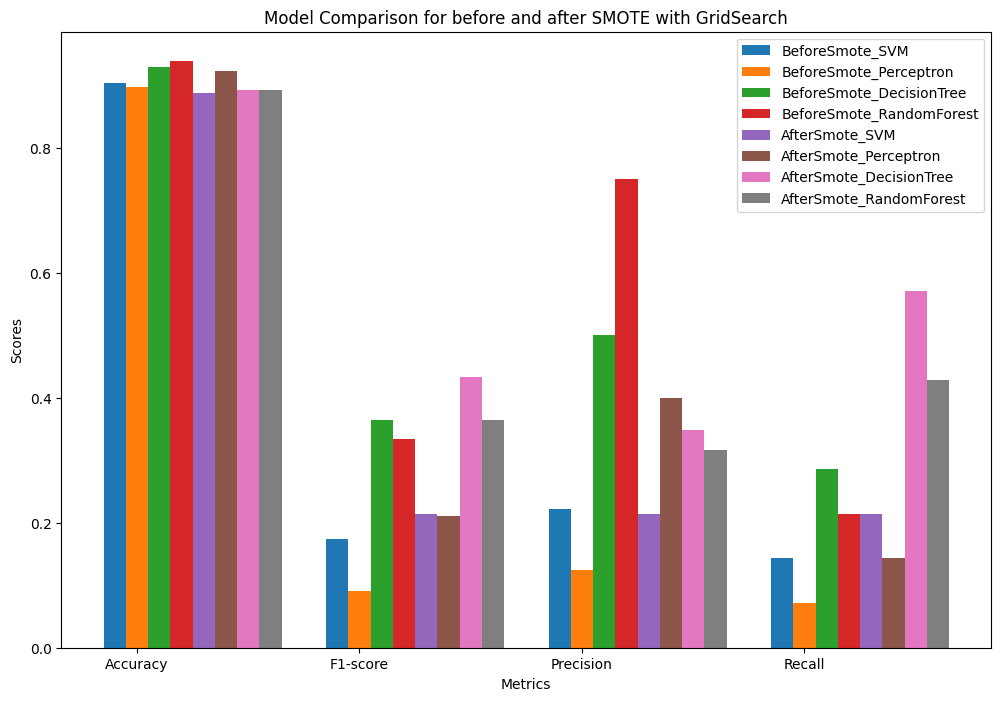

In [ ]:
from re import A
# Define your metrics
plt.figure(figsize=(12, 8))
metrics = ['Accuracy', 'F1-score', 'Precision','Recall']
BeforeSmote_SVM = [
    accuracy_imb_svm_gs, f1_score_imb_svm_gs, precision_score_imb_svm_gs, recall_score_imb_svm_gs]
BeforeSmote_Perceptron = [
    accuracy_imb_percep_gs, f1_score_imb_percep_gs, precision_score_imb_percep_gs, recall_score_imb_percep_gs]
BeforeSmote_DecisionTree = [
    accuracy_imb_dtree_gs, f1_score_imb_dtree_gs, precision_score_imb_dtree_gs, recall_score_imb_dtree_gs]
BeforeSmote_RandomForest = [
    accuracy_imbal_rf_gs, f1_score_imbal_rf_gs, precision_imbal_rf_gs, recall_imbal_rf_gs]
#----------------------------------------------------------------------------------------------------------
AfterSmote_SVM=[
accuracy_bal_svm_gs, f1_score_ibal_svm_gs, precision_score_bal_svm_gs, recall_score_bal_svm_gs]
AfterSmote_Perceptron = [
    accuracy_bal_percep_gs, f1_score_ibal_percep_gs, precision_score_bal_percep_gs, recall_score_bal_percep_gs]
AfterSmote_DecisionTree = [
    accuracy_bal_dtree_gs, f1_score_ibal_dtree_gs, precision_score_bal_dtree_gs, recall_score_bal_dtree_gs]
AfterSmote_RandomForest = [
    accuracy_bal_rf_gs, f1_score_bal_rf_gs, precision_bal_rf_gs, recall_bal_rf_gs]

# Plot comparison
index = np.arange(len(metrics))
bar_width = 0.1
plt.bar(index, BeforeSmote_SVM, bar_width, label='BeforeSmote_SVM')
plt.bar(index + bar_width*1, BeforeSmote_Perceptron, bar_width, label='BeforeSmote_Perceptron')
plt.bar(index + bar_width*2, BeforeSmote_DecisionTree, bar_width, label='BeforeSmote_DecisionTree')
plt.bar(index + bar_width*3, BeforeSmote_RandomForest, bar_width, label='BeforeSmote_RandomForest')
plt.bar(index + bar_width*4, AfterSmote_SVM, bar_width, label='AfterSmote_SVM')
plt.bar(index + bar_width*5, AfterSmote_Perceptron, bar_width, label='AfterSmote_Perceptron')
plt.bar(index + bar_width*6, AfterSmote_DecisionTree, bar_width, label='AfterSmote_DecisionTree')
plt.bar(index + bar_width*7, AfterSmote_RandomForest, bar_width, label='AfterSmote_RandomForest')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Model Comparison for before and after SMOTE with GridSearch')
plt.xticks(index + bar_width, metrics)
plt.legend()
plt.show()

##Apply Random Search on Imbalanced Dataset

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define parameter distribution
param_dist = {
    'n_estimators': randint(50, 100, 500),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': randint(2, 20),
    #'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None]
}

# Initialize Random Forest Classifier
rftree = RandomForestClassifier(random_state=42)

# Perform Randomized Search
random_search = RandomizedSearchCV(
    estimator=rftree,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings sampled
    cv=5,
    scoring='accuracy',
    verbose=2,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", random_search.best_params_)

# Train with optimal parameters
best_rftree = random_search.best_estimator_
y_pred_balanced = best_rftree.predict(X_test)

# Report metrics
print("\nClassification Report :")
imbalanced_report = classification_report(y_test, y_pred_balanced)
print(imbalanced_report)
accuracy_bal_rf = accuracy_score(y_test, y_pred_balanced)
precision_bal_rf = precision_score(y_test, y_pred_balanced)
recall_bal_rf = recall_score(y_test, y_pred_balanced)
f1_score_bal_rf = f1_score(y_test, y_pred_balanced)

print("Accuracy for balanced dataset", accuracy_bal_rf)
print("Precision for balanced dataset", precision_bal_rf)
print("Recall for balanced dataset", recall_bal_rf)
print("F1 score for balanced dataset", f1_score_bal_rf)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 586}

Classification Report :
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       182
           1       0.60      0.21      0.32        14

    accuracy                           0.93       196
   macro avg       0.77      0.60      0.64       196
weighted avg       0.92      0.93      0.92       196

Accuracy for balanced dataset 0.9336734693877551
Precision for balanced dataset 0.6
Recall for balanced dataset 0.21428571428571427
F1 score for balanced dataset 0.3157894736842105


In [ ]:
# list of models
models = [Perceptron(), SVC(kernel='linear'), DecisionTreeClassifier(), RandomForestClassifier(random_state=0)]

## Apply Hyper Parameter Tuning on Imbalanced Dataset



In [ ]:
models_list_rs = [Perceptron(), SVC(kernel='linear'), DecisionTreeClassifier(), RandomForestClassifier(random_state=0)]

In [ ]:
# creating a dictionary that contains hyperparameter values for the above mentioned models


rs_model_hyperparameters = {
    'perceptron_hyperparameters': {
        'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100],  # Regularization strength
        'max_iter': [1000, 5000, 10000]       # Number of iterations
    },
    'svc_hyperparameters': {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel types
        'C': [1, 5, 10, 20]                             # Regularization strength
    },
    'decision_tree_hyperparameters': {
        'max_depth': [5, 10, 20, 30, 40, 50],                # Maximum depth of tree
        'min_samples_split': [2, 5, 10],                # Minimum samples to split a node
        'criterion': ['gini', 'entropy']                # Splitting criteria
    },
    'random_forest_hyperparameters': {
        'n_estimators': [10, 20, 50, 100, 500, 1000],              # Number of trees
        'max_depth': [5, 10, 20, 30, 40, 50],                    # Maximum depth of trees
        'min_samples_split': [2, 5, 10, 20],                 # Minimum samples to split a node
        'max_features': ['sqrt', 'log2', None]
    }
}


In [ ]:
model_keys_rs = list(rs_model_hyperparameters.keys())
print(model_keys_rs)

['perceptron_hyperparameters', 'svc_hyperparameters', 'decision_tree_hyperparameters', 'random_forest_hyperparameters']


##Apply Randomized Search on Imbalanced Dataset

In [ ]:
def RandomSearchModelSelection(model_list, hyperparameters_dictionary, n_iter=100):

    results = []
    i=0
    for model in model_list:
      key = model_keys_rs[i] # Accessing the key for the current model
      params = hyperparameters_dictionary[key]
      i += 1

      print(model)
      print(params)
      print('-----------------------------------------------------------------')


        # Initializing RandomizedSearchCV
      classifier = RandomizedSearchCV(model, params, n_iter = n_iter, cv=5, scoring='accuracy', random_state=42, verbose=2, n_jobs=-1 )

        # Fitting the model
      classifier.fit(X_train, y_train)

        # Appending the results
      results.append({
            'model used': key,
            'highest score': classifier.best_score_,
            'best hyperparameters': classifier.best_params_
        })

    # Converting the results to a DataFrame
    result_dataframe = pd.DataFrame(results, columns=['model used', 'highest score', 'best hyperparameters'])

    return result_dataframe


In [ ]:
ssd1 = RandomSearchModelSelection(models_list_rs, rs_model_hyperparameters, n_iter=100)

Perceptron()
{'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100], 'max_iter': [1000, 5000, 10000]}
-----------------------------------------------------------------
Fitting 5 folds for each of 21 candidates, totalling 105 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 21 is smaller than n_iter=100. Running 21 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


SVC(kernel='linear')
{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}
-----------------------------------------------------------------
Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 16 is smaller than n_iter=100. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


DecisionTreeClassifier()
{'max_depth': [5, 10, 20, 30, 40, 50], 'min_samples_split': [2, 5, 10], 'criterion': ['gini', 'entropy']}
-----------------------------------------------------------------
Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 36 is smaller than n_iter=100. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomForestClassifier(random_state=0)
{'n_estimators': [10, 20, 50, 100, 500, 1000], 'max_depth': [5, 10, 20, 30, 40, 50], 'min_samples_split': [2, 5, 10, 20], 'max_features': ['sqrt', 'log2', None]}
-----------------------------------------------------------------
Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [ ]:
ssd1.head()

,model used,highest score,best hyperparameters
0,perceptron_hyperparameters,0.877496,"{'max_iter': 1000, 'alpha': 0.0001}"
1,svc_hyperparameters,0.919135,"{'kernel': 'rbf', 'C': 10}"
2,decision_tree_hyperparameters,0.912542,"{'min_samples_split': 10, 'max_depth': 5, 'cri..."
3,random_forest_hyperparameters,0.919040,"{'n_estimators': 1000, 'min_samples_split': 5,..."


In [ ]:
ssd1['best hyperparameters'][3]

{'n_estimators': 1000,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 40}

In [ ]:

 # Step 4: Apply best parameters to Ensemble Random Forest
print("\nStep 4: Applying Best Parameters Ensemble Random Forest to imbalanced training set")
rftree = RandomForestClassifier(random_state=42, max_depth=40, min_samples_split=5,n_estimators=1000, max_features='sqrt')

# Train an Ensemble Random Forest on the Imbalanced Dataset
print("Training an Ensemble Random Foreston the imbalanced dataset")
rftree .fit(X_train, y_train)
y_pred_imbalanced = rftree.predict(X_test)

# Report metrics
print("\nClassification Report :")
imbalanced_report = classification_report(y_test, y_pred_imbalanced)
print(imbalanced_report)
accuracy_imbal_rf_rs=accuracy_score(y_test, y_pred_imbalanced)
precision_imbal_rf_rs=precision_score(y_test, y_pred_imbalanced)
recall_imbal_rf_rs=recall_score(y_test, y_pred_imbalanced)
f1_score_imbal_rf_rs=f1_score(y_test, y_pred_imbalanced)
print("Accuracy for imbalanced dataset",accuracy_imbal_rf_rs)
print("Precision for imbalanced dataset",precision_imbal_rf_rs)
print("Recall for imbalanced dataset",recall_imbal_rf_rs)
print("F1 score for imbalanced dataset",f1_score_imbal_rf_rs)
cm_rf_rs=confusion_matrix(y_test, y_pred_imbalanced)
#Get values for TP, TN, FP, FN
TP,TN,FP, FN =cm_rf_rs.ravel()
print("True Positive",TP)
print("True Negative",TN)
print("False Positive",FP)
print("False Negative",FN)
print("Confusion Matrix Report for imbalanced dataset Random Forest", cm_rf_rs)


Step 4: Applying Best Parameters Ensemble Random Forest to imbalanced training set
Training an Ensemble Random Foreston the imbalanced dataset

Classification Report :
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       182
           1       0.60      0.21      0.32        14

    accuracy                           0.93       196
   macro avg       0.77      0.60      0.64       196
weighted avg       0.92      0.93      0.92       196

Accuracy for imbalanced dataset 0.9336734693877551
Precision for imbalanced dataset 0.6
Recall for imbalanced dataset 0.21428571428571427
F1 score for imbalanced dataset 0.3157894736842105
True Positive 180
True Negative 2
False Positive 11
False Negative 3
Confusion Matrix Report for imbalanced dataset Random Forest [[180   2]
 [ 11   3]]


In [ ]:
ssd1['best hyperparameters'][2]

{'min_samples_split': 10, 'max_depth': 5, 'criterion': 'entropy'}

In [ ]:
# Step 3: Train an decision tree on the Imbalanced Dataset
print("\nStep 3: Training an decision tree on the imbalanced dataset")
dtree = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10 ,criterion= 'entropy')
dtree .fit(X_train, y_train)
y_pred_imbalanced = dtree.predict(X_test)

# Report metrics before SMOTE
print("\nClassification Report Before SMOTE:")
imbalanced_report = classification_report(y_test, y_pred_imbalanced)
print(imbalanced_report)
accuracy_imb_dtree_rs=accuracy_score(y_test, y_pred_imbalanced)
precision_score_imb_dtree_rs=precision_score(y_test, y_pred_imbalanced)
recall_score_imb_dtree_rs=recall_score(y_test, y_pred_imbalanced)
f1_score_imb_dtree_rs=f1_score(y_test, y_pred_imbalanced)
print("Accuracy for imbalanced dataset",accuracy_imb_dtree_rs)
print("Precision for imbalanced dataset",precision_score_imb_dtree_rs)
print("Recall for imbalanced dataset",recall_score_imb_dtree_rs)
print("F1 score for imbalanced dataset",f1_score_imb_dtree_rs)
cm_dtree_rs=confusion_matrix(y_test, y_pred_imbalanced)
#Get values for TP, TN, FP, FN
TP,TN,FP, FN =cm_dtree_rs.ravel()
print("True Positive",TP)
print("True Negative",TN)
print("False Positive",FP)
print("False Negative",FN)
print("Confusion Matrix Report for imbalanced dataset Decision Tree", cm_dtree_rs)


Step 3: Training an decision tree on the imbalanced dataset

Classification Report Before SMOTE:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       182
           1       0.50      0.29      0.36        14

    accuracy                           0.93       196
   macro avg       0.72      0.63      0.66       196
weighted avg       0.91      0.93      0.92       196

Accuracy for imbalanced dataset 0.9285714285714286
Precision for imbalanced dataset 0.5
Recall for imbalanced dataset 0.2857142857142857
F1 score for imbalanced dataset 0.36363636363636365
True Positive 178
True Negative 4
False Positive 10
False Negative 4
Confusion Matrix Report for imbalanced dataset Decision Tree [[178   4]
 [ 10   4]]


In [ ]:
ssd1['best hyperparameters'][1]

{'kernel': 'rbf', 'C': 10}

In [ ]:
# Step 3: Train an SVM on the Imbalanced Dataset
print("\nStep 3: Training an SVM on the imbalanced dataset")
svm = SVC(kernel='rbf', C=10 )
svm.fit(X_train, y_train)
y_pred_imbalanced = svm.predict(X_test)

# Report metrics before SMOTE
print("\nClassification Report Before SMOTE:")
imbalanced_report = classification_report(y_test, y_pred_imbalanced)
print(imbalanced_report)
accuracy_imb_svm_rs=accuracy_score(y_test, y_pred_imbalanced)
precision_score_imb_svm_rs=precision_score(y_test, y_pred_imbalanced)
recall_score_imb_svm_rs=recall_score(y_test, y_pred_imbalanced)
f1_score_imb_svm_rs=f1_score(y_test, y_pred_imbalanced)
print("Accuracy for imbalanced dataset",accuracy_imb_svm_rs)
print("Precision for imbalanced dataset",precision_score_imb_svm_rs)
print("Recall for imbalanced dataset",recall_score_imb_svm_rs)
print("F1 score for imbalanced dataset",f1_score_imb_svm_rs)
cm_svm_rs=confusion_matrix(y_test, y_pred_imbalanced)
#Get values for TP, TN, FP, FN
TP,TN,FP, FN =cm_svm_rs.ravel()
print("True Positive",TP)
print("True Negative",TN)
print("False Positive",FP)
print("False Negative",FN)
print("Confusion Matrix Report for imbalanced dataset SVM", cm_svm_rs)


Step 3: Training an SVM on the imbalanced dataset

Classification Report Before SMOTE:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       182
           1       0.22      0.14      0.17        14

    accuracy                           0.90       196
   macro avg       0.58      0.55      0.56       196
weighted avg       0.88      0.90      0.89       196

Accuracy for imbalanced dataset 0.9030612244897959
Precision for imbalanced dataset 0.2222222222222222
Recall for imbalanced dataset 0.14285714285714285
F1 score for imbalanced dataset 0.17391304347826086
True Positive 175
True Negative 7
False Positive 12
False Negative 2
Confusion Matrix Report for imbalanced dataset SVM [[175   7]
 [ 12   2]]


In [ ]:
ssd1['best hyperparameters'][0]

{'max_iter': 1000, 'alpha': 0.0001}

In [ ]:
# Step 3: Train an perceptron on the Imbalanced Dataset
print("\nStep 3: Training an perceptron on the imbalanced dataset")
perceptron = Perceptron(alpha= 0.0001, max_iter= 1000)
perceptron .fit(X_train, y_train)
y_pred_imbalanced = perceptron.predict(X_test)

# Report metrics before SMOTE
print("\nClassification Report Before SMOTE:")
imbalanced_report = classification_report(y_test, y_pred_imbalanced)
print(imbalanced_report)
accuracy_imb_percep_rs=accuracy_score(y_test, y_pred_imbalanced)
precision_score_imb_percep_rs=precision_score(y_test, y_pred_imbalanced)
recall_score_imb_percep_rs=recall_score(y_test, y_pred_imbalanced)
f1_score_imb_percep_rs=f1_score(y_test, y_pred_imbalanced)
print("Accuracy for imbalanced dataset",accuracy_imb_percep_rs)
print("Precision for imbalanced dataset",precision_score_imb_percep_rs)
print("Recall for imbalanced dataset",recall_score_imb_percep_rs)
print("F1 score for imbalanced dataset",f1_score_imb_percep_rs)
cm_perceptron_rs=confusion_matrix(y_test, y_pred_imbalanced)
#Get values for TP, TN, FP, FN
TP,TN,FP, FN =cm_perceptron_rs.ravel()
print("True Positive",TP)
print("True Negative",TN)
print("False Positive",FP)
print("False Negative",FN)
print("Confusion Matrix Report for imbalanced dataset Perceptron", cm_perceptron_rs)


Step 3: Training an perceptron on the imbalanced dataset

Classification Report Before SMOTE:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       182
           1       0.12      0.07      0.09        14

    accuracy                           0.90       196
   macro avg       0.53      0.52      0.52       196
weighted avg       0.87      0.90      0.88       196

Accuracy for imbalanced dataset 0.8979591836734694
Precision for imbalanced dataset 0.125
Recall for imbalanced dataset 0.07142857142857142
F1 score for imbalanced dataset 0.09090909090909091
True Positive 175
True Negative 7
False Positive 13
False Negative 1
Confusion Matrix Report for imbalanced dataset Perceptron [[175   7]
 [ 13   1]]


## Apply Hyper Parameter Tuning on SMOTE Balanced Dataset


In [ ]:
models_list_rs_smote = [Perceptron(), SVC(kernel='linear'), DecisionTreeClassifier(), RandomForestClassifier(random_state=0)]

In [ ]:
# creating a dictionary that contains hyperparameter values for the above mentioned models


Smote_rs_model_hyperparameters = {
    'perceptron_hyperparameters': {
        'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100],  # Regularization strength
        'max_iter': [1000, 5000, 10000]       # Number of iterations
    },
    'svc_hyperparameters': {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel types
        'C': [1, 5, 10, 20]                             # Regularization strength
    },
    'decision_tree_hyperparameters': {
        'max_depth': [5, 10, 20, 30, 40, 50],                # Maximum depth of tree
        'min_samples_split': [2, 5, 10],                # Minimum samples to split a node
        'criterion': ['gini', 'entropy']                # Splitting criteria
    },
    'random_forest_hyperparameters': {
        'n_estimators': [10, 20, 50, 100, 500, 1000],              # Number of trees
        'max_depth': [5, 10, 20, 30, 40, 50],                    # Maximum depth of trees
        'min_samples_split': [2, 5, 10, 20],                 # Minimum samples to split a node
        'max_features': ['sqrt', 'log2', None]
    }
}


In [ ]:
model_keys_rs_smote = list(Smote_rs_model_hyperparameters.keys())
print(model_keys_rs_smote)

['perceptron_hyperparameters', 'svc_hyperparameters', 'decision_tree_hyperparameters', 'random_forest_hyperparameters']


In [ ]:
def RandomSearchModelSelectionSmote(model_list, hyperparameters_dictionary, n_iter=100):

    results = []
    i=0
    for model in model_list:
      key = model_keys_rs_smote[i] # Accessing the key for the current model
      params = hyperparameters_dictionary[key]
      i += 1

      print(model)
      print(params)
      print('-----------------------------------------------------------------')


        # Initializing RandomizedSearchCV
      classifier = RandomizedSearchCV(model, params, n_iter = n_iter, cv=5, scoring='accuracy', random_state=42, verbose=2, n_jobs=-1 )

        # Fitting the model
      classifier.fit(X_train_smote, y_train_smote)

        # Appending the results
      results.append({
            'model used': key,
            'highest score': classifier.best_score_,
            'best hyperparameters': classifier.best_params_
        })

    # Converting the results to a DataFrame
    result_dataframe = pd.DataFrame(results, columns=['model used', 'highest score', 'best hyperparameters'])

    return result_dataframe


In [ ]:
ssd2 = RandomSearchModelSelectionSmote(models_list_rs_smote, Smote_rs_model_hyperparameters)

Perceptron()
{'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100], 'max_iter': [1000, 5000, 10000]}
-----------------------------------------------------------------
Fitting 5 folds for each of 21 candidates, totalling 105 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 21 is smaller than n_iter=100. Running 21 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


SVC(kernel='linear')
{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}
-----------------------------------------------------------------
Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 16 is smaller than n_iter=100. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


DecisionTreeClassifier()
{'max_depth': [5, 10, 20, 30, 40, 50], 'min_samples_split': [2, 5, 10], 'criterion': ['gini', 'entropy']}
-----------------------------------------------------------------
Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 36 is smaller than n_iter=100. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomForestClassifier(random_state=0)
{'n_estimators': [10, 20, 50, 100, 500, 1000], 'max_depth': [5, 10, 20, 30, 40, 50], 'min_samples_split': [2, 5, 10, 20], 'max_features': ['sqrt', 'log2', None]}
-----------------------------------------------------------------
Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [ ]:
ssd2['best hyperparameters'][3]

{'n_estimators': 500,
 'min_samples_split': 2,
 'max_features': 'sqrt',
 'max_depth': 20}

In [ ]:
# Step 4: Apply Best parameters Ensemble Random Forest on Balanced dataset
print("\nStep 4: Applying Ensemble Random Forest to balance the training set")
rftree = RandomForestClassifier(max_depth=20, min_samples_split=2,n_estimators= 500 , max_features='sqrt',random_state=42)

# Train an Ensemble Random Forest on the balanced Dataset
print("Training an Ensemble Random Foreston the balanced dataset")
rftree .fit(X_train_smote, y_train_smote)
y_pred_balanced = rftree.predict(X_test)

# Report metrics
print("\nClassification Report :")
imbalanced_report = classification_report(y_test, y_pred_balanced)
print(imbalanced_report)
accuracy_bal_rf_rs=accuracy_score(y_test, y_pred_balanced)
precision_bal_rf_rs=precision_score(y_test, y_pred_balanced)
recall_bal_rf_rs=recall_score(y_test, y_pred_balanced)
f1_score_bal_rf_rs=f1_score(y_test, y_pred_balanced)
print("Accuracy for balanced dataset",accuracy_bal_rf_rs)
print("Precision for balanced dataset",precision_bal_rf_rs)
print("Recall for balanced dataset",recall_bal_rf_rs)
print("F1 score for balanced dataset",f1_score_bal_rf_rs)
cm_rf_smote_rs=confusion_matrix(y_test, y_pred_balanced)
#Get values for TP, TN, FP, FN
TP,TN,FP, FN =cm_rf_smote_rs.ravel()
print("True Positive",TP)
print("True Negative",TN)
print("False Positive",FP)
print("False Negative",FN)
print("Confusion Matrix Report for balanced dataset Random forest", cm_rf_smote_rs)


Step 4: Applying Ensemble Random Forest to balance the training set
Training an Ensemble Random Foreston the balanced dataset

Classification Report :
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       182
           1       0.37      0.50      0.42        14

    accuracy                           0.90       196
   macro avg       0.66      0.72      0.69       196
weighted avg       0.92      0.90      0.91       196

Accuracy for balanced dataset 0.9030612244897959
Precision for balanced dataset 0.3684210526315789
Recall for balanced dataset 0.5
F1 score for balanced dataset 0.42424242424242425
True Positive 170
True Negative 12
False Positive 7
False Negative 7
Confusion Matrix Report for balanced dataset Random forest [[170  12]
 [  7   7]]


In [ ]:
ssd2['best hyperparameters'][0]

{'max_iter': 1000, 'alpha': 0.0001}

In [ ]:
# Step 5: Train an Perceptron on the Balanced Dataset
print("\nStep 5: Training an perceptron on the SMOTE-balanced dataset")
perceptron_smote = Perceptron(alpha= 0.0001, max_iter= 1000)
perceptron_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = perceptron_smote.predict(X_test)

# Report metrics after SMOTE
print("\nClassification Report After SMOTE:")
smote_report = classification_report(y_test, y_pred_smote)
print(smote_report)
accuracy_bal_percep_rs=accuracy_score(y_test, y_pred_smote)
precision_score_bal_percep_rs=precision_score(y_test, y_pred_smote)
recall_score_bal_percep_rs=recall_score(y_test, y_pred_smote)
f1_score_ibal_percep_rs=f1_score(y_test, y_pred_smote)
print("Accuracy for balanced dataset",accuracy_bal_percep_rs)
print("Precision for balanced dataset",precision_score_bal_percep_rs)
print("Recall for balanced dataset",recall_score_bal_percep_rs)
print("F1 score for balanced dataset",f1_score_ibal_percep_rs)
cm_perceptron_smote_rs=confusion_matrix(y_test, y_pred_smote)
#Get values for TP, TN, FP, FN
TP,TN,FP, FN =cm_perceptron_smote_rs.ravel()
print("True Positive",TP)
print("True Negative",TN)
print("False Positive",FP)
print("False Negative",FN)
print("Confusion Matrix Report for balanced dataset Perceptron", cm_perceptron_smote_rs)


Step 5: Training an perceptron on the SMOTE-balanced dataset

Classification Report After SMOTE:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       182
           1       0.40      0.14      0.21        14

    accuracy                           0.92       196
   macro avg       0.67      0.56      0.59       196
weighted avg       0.90      0.92      0.91       196

Accuracy for balanced dataset 0.923469387755102
Precision for balanced dataset 0.4
Recall for balanced dataset 0.14285714285714285
F1 score for balanced dataset 0.21052631578947367
True Positive 179
True Negative 3
False Positive 12
False Negative 2
Confusion Matrix Report for balanced dataset Perceptron [[179   3]
 [ 12   2]]


In [ ]:
ssd2['best hyperparameters'][1]

{'kernel': 'rbf', 'C': 5}

In [ ]:
# Step 5: Train an SVM on the Balanced Dataset
print("\nStep 5: Training an SVM on the SMOTE-balanced dataset")
svm_smote = SVC(C=5 ,kernel='rbf')
svm_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = svm_smote.predict(X_test)

# Report metrics after SMOTE
print("\nClassification Report After SMOTE:")
smote_report = classification_report(y_test, y_pred_smote)
print(smote_report)
accuracy_bal_svm_rs=accuracy_score(y_test, y_pred_smote)
precision_score_bal_svm_rs=precision_score(y_test, y_pred_smote)
recall_score_bal_svm_rs=recall_score(y_test, y_pred_smote)
f1_score_ibal_svm_rs=f1_score(y_test, y_pred_smote)
print("Accuracy for balanced dataset",accuracy_bal_svm_rs)
print("Precision for balanced dataset",precision_score_bal_svm_rs)
print("Recall for balanced dataset",recall_score_bal_svm_rs)
print("F1 score for balanced dataset",f1_score_ibal_svm_rs)
cm_svm_smote_rs=confusion_matrix(y_test, y_pred_smote)
#Get values for TP, TN, FP, FN
TP,TN,FP, FN =cm_svm_smote_rs.ravel()
print("True Positive",TP)
print("True Negative",TN)
print("False Positive",FP)
print("False Negative",FN)
print("Confusion Matrix Report for balanced dataset SVM", cm_svm_smote_rs)


Step 5: Training an SVM on the SMOTE-balanced dataset

Classification Report After SMOTE:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       182
           1       0.21      0.21      0.21        14

    accuracy                           0.89       196
   macro avg       0.58      0.58      0.58       196
weighted avg       0.89      0.89      0.89       196

Accuracy for balanced dataset 0.8877551020408163
Precision for balanced dataset 0.21428571428571427
Recall for balanced dataset 0.21428571428571427
F1 score for balanced dataset 0.21428571428571427
True Positive 171
True Negative 11
False Positive 11
False Negative 3
Confusion Matrix Report for balanced dataset SVM [[171  11]
 [ 11   3]]


In [ ]:
ssd2['best hyperparameters'][2]

{'min_samples_split': 2, 'max_depth': 20, 'criterion': 'gini'}

In [ ]:
# Step 5: Train an decision tree on the Balanced Dataset
print("\nStep 5: Training an decision tree on the SMOTE-balanced dataset")
dtree_smote = DecisionTreeClassifier(random_state=42, max_depth=30, min_samples_split=2, criterion= 'gini')
dtree_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = dtree_smote.predict(X_test)

# Report metrics after SMOTE
print("\nClassification Report After SMOTE:")
smote_report = classification_report(y_test, y_pred_smote)
print(smote_report)
accuracy_bal_dtree_rs=accuracy_score(y_test, y_pred_smote)
precision_score_bal_dtree_rs=precision_score(y_test, y_pred_smote)
recall_score_bal_dtree_rs=recall_score(y_test, y_pred_smote)
f1_score_ibal_dtree_rs=f1_score(y_test, y_pred_smote)
print("Accuracy for balanced dataset",accuracy_bal_dtree_rs)
print("Precision for balanced dataset",precision_score_bal_dtree_rs)
print("Recall for balanced dataset",recall_score_bal_dtree_rs)
print("F1 score for balanced dataset",f1_score_ibal_dtree_rs)
cm_dtree_smote_rs=confusion_matrix(y_test, y_pred_smote)
#Get values for TP, TN, FP, FN
TP,TN,FP, FN =cm_dtree_smote_rs.ravel()
print("True Positive",TP)
print("True Negative",TN)
print("False Positive",FP)
print("False Negative",FN)
print("Confusion Matrix Report for balanced dataset Decison Tree", cm_dtree_smote_rs)


Step 5: Training an decision tree on the SMOTE-balanced dataset

Classification Report After SMOTE:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       182
           1       0.32      0.64      0.43        14

    accuracy                           0.88       196
   macro avg       0.65      0.77      0.68       196
weighted avg       0.92      0.88      0.90       196

Accuracy for balanced dataset 0.8775510204081632
Precision for balanced dataset 0.32142857142857145
Recall for balanced dataset 0.6428571428571429
F1 score for balanced dataset 0.42857142857142855
True Positive 163
True Negative 19
False Positive 5
False Negative 9
Confusion Matrix Report for balanced dataset Decison Tree [[163  19]
 [  5   9]]


Visualization of the tuned models with random search using Bar graph

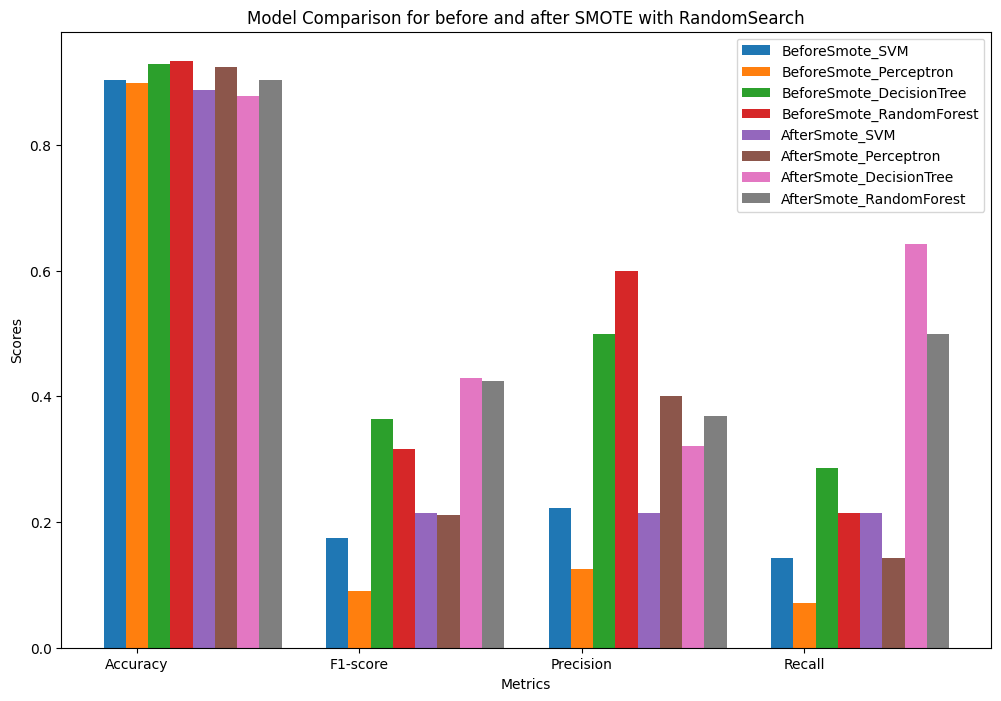

In [ ]:
from re import A
# Define your metrics
plt.figure(figsize=(12, 8))
metrics = ['Accuracy', 'F1-score', 'Precision','Recall']
BeforeSmote_SVM = [
    accuracy_imb_svm_rs, f1_score_imb_svm_rs, precision_score_imb_svm_rs, recall_score_imb_svm_rs]
BeforeSmote_Perceptron = [
    accuracy_imb_percep_rs, f1_score_imb_percep_rs, precision_score_imb_percep_rs, recall_score_imb_percep_rs]
BeforeSmote_DecisionTree = [
    accuracy_imb_dtree_rs, f1_score_imb_dtree_rs, precision_score_imb_dtree_rs, recall_score_imb_dtree_rs]
BeforeSmote_RandomForest = [
    accuracy_imbal_rf_rs, f1_score_imbal_rf_rs, precision_imbal_rf_rs, recall_imbal_rf_rs]
#----------------------------------------------------------------------------------------------------------
AfterSmote_SVM=[
accuracy_bal_svm_rs, f1_score_ibal_svm_rs, precision_score_bal_svm_rs, recall_score_bal_svm_rs]
AfterSmote_Perceptron = [
    accuracy_bal_percep_rs, f1_score_ibal_percep_rs, precision_score_bal_percep_rs, recall_score_bal_percep_rs]
AfterSmote_DecisionTree = [
    accuracy_bal_dtree_rs, f1_score_ibal_dtree_rs, precision_score_bal_dtree_rs, recall_score_bal_dtree_rs]
AfterSmote_RandomForest = [
    accuracy_bal_rf_rs, f1_score_bal_rf_rs, precision_bal_rf_rs, recall_bal_rf_rs]

# Plot comparison
index = np.arange(len(metrics))
bar_width = 0.1

plt.bar(index, BeforeSmote_SVM, bar_width, label='BeforeSmote_SVM')
plt.bar(index + bar_width*1, BeforeSmote_Perceptron, bar_width, label='BeforeSmote_Perceptron')
plt.bar(index + bar_width*2, BeforeSmote_DecisionTree, bar_width, label='BeforeSmote_DecisionTree')
plt.bar(index + bar_width*3, BeforeSmote_RandomForest, bar_width, label='BeforeSmote_RandomForest')
plt.bar(index + bar_width*4, AfterSmote_SVM, bar_width, label='AfterSmote_SVM')
plt.bar(index + bar_width*5, AfterSmote_Perceptron, bar_width, label='AfterSmote_Perceptron')
plt.bar(index + bar_width*6, AfterSmote_DecisionTree, bar_width, label='AfterSmote_DecisionTree')
plt.bar(index + bar_width*7, AfterSmote_RandomForest, bar_width, label='AfterSmote_RandomForest')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Model Comparison for before and after SMOTE with RandomSearch')
plt.xticks(index + bar_width, metrics)
plt.legend()
plt.show()